In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#pd.options.display.max_rows = 999
#pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('Speed Dating Data.csv')

In [3]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(6837, 195)

In [5]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,6837.000000,6837.000000,6837.000000,6837.000000,6837.000000,6837.000000,6837.000000,6837.000000,4991.000000,6837.000000,...,3423.000000,3423.000000,3423.000000,3423.000000,3423.000000,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,232.077519,8.748866,0.498318,16.900395,1.808249,9.337136,16.458681,8.862513,9.074735,8.718444,...,7.263804,8.113351,8.482033,7.664914,7.430032,6.788396,7.653242,7.955631,7.124915,7.022526
std,127.215878,5.331983,0.500034,10.610319,0.393707,4.668218,4.141718,5.365227,5.480684,5.314495,...,1.577789,1.588424,1.425599,1.752735,1.988056,1.265452,1.327475,1.345432,1.608579,1.815284
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,3.000000,5.000000,1.000000,1.000000
25%,117.000000,4.000000,0.000000,8.000000,2.000000,5.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,235.000000,8.000000,0.000000,16.000000,2.000000,10.000000,18.000000,8.000000,8.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,346.000000,13.000000,1.000000,25.000000,2.000000,14.000000,20.000000,13.000000,13.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


**Missing values**

In [6]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

num_in_3    0.924967
sinc7_2     0.914875
amb7_2      0.914875
shar7_2     0.912096
attr7_2     0.910633
              ...   
wave        0.000000
condtn      0.000000
idg         0.000000
gender      0.000000
iid         0.000000
Length: 195, dtype: float64

<AxesSubplot:>

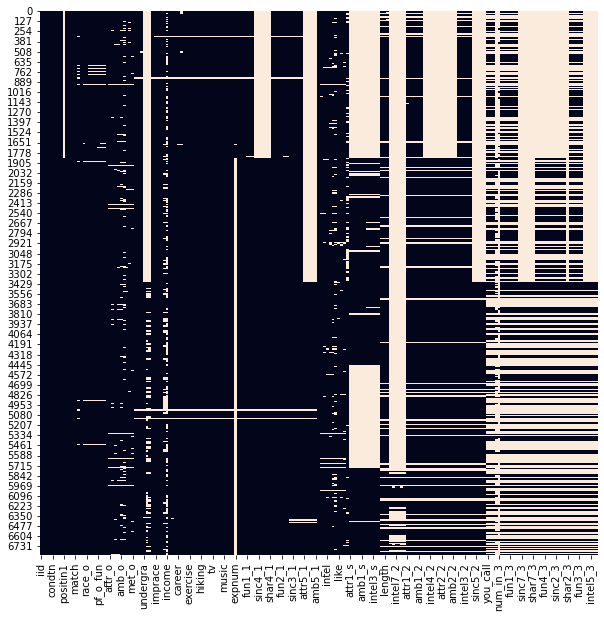

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.isna(), cbar=False)

**Matches**

In [8]:
# percentage of matches
df['match'].sum()/2/df.shape[0]*100

8.40280824923212

In [9]:
df['gender_category'] = df['gender'].apply(lambda x: 'female' if x==0 else 'male')

[Text(0.5, 1.0, 'total count of positive and negative anwser')]

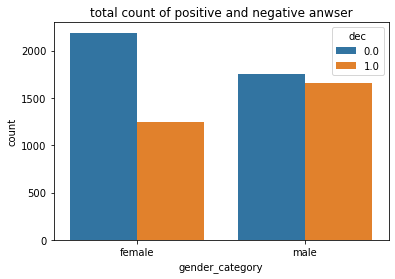

In [10]:
sns.countplot(x="gender_category", hue='dec', data=df).set(title='total count of positive and negative anwser')

In [53]:
no_love_count = len(df[(df['dec_o']==0) & (df['dec']==1)])
perc_broken_heart = no_love_count / len(df.index)
perc_broken_heart*100

25.610647945005123

About 8% of the date resulted in a match. 25% of the participants had they heart broken. 

Female are more likely to not propose a second date. For male it's 50/50.

**Infos about the participants**

In [11]:
print('there are', df['iid'].nunique(), 'participants in total')

there are 458 participants in total


In [12]:
df_unique_id = df.drop_duplicates(subset = ['iid'])

In [13]:
df_unique_id['gender_category'] = df_unique_id['gender'].apply(lambda x: 'female' if x==0 else 'male')

C:\Users\Baptiste Cournault\AppData\Local\Temp\ipykernel_18464\4004362734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_id['gender_category'] = df_unique_id['gender'].apply(lambda x: 'female' if x==0 else 'male')


In [14]:
fig1 = px.histogram(df_unique_id, x='gender_category', title = 'Gender repartition', height=400, width=600)
fig1.show()

In [15]:
fig2 = px.histogram(df_unique_id, x='age', title = 'Age of the participants', height=400, width=600)
fig2.show()

In [16]:
race_label = {1:'Black', 2:'European', 3:'Latino', 4:'Asian', 5:'Native American', 6:'Other'}
df_unique_id['race_category'] = df_unique_id['race'].map(race_label)

C:\Users\Baptiste Cournault\AppData\Local\Temp\ipykernel_18464\785814821.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
fig3 = px.histogram(df_unique_id, x='race_category', title = 'Ethnicity of the participants', height=400, width=600)
fig3.show()

In [18]:
field_list = ["Law", "Math", "Social Science, Psychologist", "Medical Science, Pharmaceuticals, and Bio Tech", "Engineering", "English/Creative Writting/Journalism",
            "History/Religion/Philosophy", "Business/Econ/Finance", "Education/Academia", "Biological Sciences/Chemistry/Physics", "Social Work", "Undergrad/undecided", "Political Science/International Affairs", 
            "Film", "Other", "Fine Arts/Arts Administration", "Languages", "Architecture", "Other"
            ]

df_unique_id['field_cd_category'] = df_unique_id['field_cd'].apply(lambda x : field_list[int(x)-1] if x == x else "not specified")

C:\Users\Baptiste Cournault\AppData\Local\Temp\ipykernel_18464\1939533538.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
career_list = ["Lawyer", "Academic/Research", "Psychologist", "Doctor/Medicine", "Engineer", "Creative Arts/Entertainment",
            "Banking/Business", "Real Estate", "International Affairs", "Undecided", "Social Work", "Speech Pathology", "Politics", 
            "Sports/Athletics", "Other", "Journalism", "Architecture"
            ]

df_unique_id['career_c_category'] = df_unique_id['career_c'].apply(lambda x : career_list[int(x)-1] if x == x else "not specified")

C:\Users\Baptiste Cournault\AppData\Local\Temp\ipykernel_18464\3563104255.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
fig4 = px.histogram(df_unique_id, y = 'career_c_category', color='gender_category', title="Distribution of intented career fields")
fig4.show()

In [21]:
fig5 = px.histogram(df_unique_id, y = 'field_cd_category', color='gender_category', title="Distribution of fields of study")
fig5.show()

**What do participants look for in the opposite sex ?**

In [22]:
df_cleaned = df[~df['wave'].isin([6, 7, 8, 9])] 
# Wave 6-9, please rate the importance of the following attributes in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important)
# Waves 1-5, 10-21: You have 100 points to distribute among the following attributes --
# give more points to those attributes that are more important in a potential date, 
# and fewer points to those attributes that are less important in a potential date. Total points must equal 100.

mask_female = df_cleaned['gender'] == 0
attributes1_1_female = df_cleaned.loc[mask_female, ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean()

mask_male = df_cleaned['gender'] == 1
attributes1_1_male = df_cleaned.loc[mask_male, ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean()

In [23]:
fig6 = go.Figure(
    data = go.Scatterpolar(
        r = attributes1_1_male.values,
        theta = attributes1_1_male.index,
        fill = 'toself',
        name = 'male'
    )
)

fig6.add_trace(
    go.Scatterpolar(
        r = attributes1_1_female.values,
        theta = attributes1_1_female.index,
        fill = 'toself',
        name = 'female'
    )
)

fig6.show()

* For male participants, the most important important criterion is attractivness, while shared interests and especially ambition are the least important criterion

* Female participants have distributed the points more equally between the different attributes. They also value more attractivness but way much less than male. Intelligence and sincerity are also criterions that stand out.


Male and female both give the same weight to fun and shared interest.

**What participants think their same-sex peers are looking for ?**

In [24]:
attributes4_1_female = df_cleaned.loc[mask_female, ['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']].mean()
attributes4_1_male = df_cleaned.loc[mask_male, ['attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1']].mean()

In [25]:
fig7 = go.Figure(
    data = go.Scatterpolar(
        r = attributes4_1_male.values,
        theta = attributes4_1_male.index,
        fill = 'toself',
        name = 'male'
    )
)

fig7.add_trace(
    go.Scatterpolar(
        r = attributes4_1_female.values,
        theta = attributes4_1_female.index,
        fill = 'toself',
        name = 'female'
    )
)

fig7.show()

* Male think that others male are also looking for an attractive female and also don't value ambition so much. They are pretty good at guessing what other people with their gender is looking for.

* For female, the graph looks different than the previous analysis. While they are looking for a male with all the 6 quality, they think their same-sex peers value much more attractivness.

**What do participants think the opposite sex is looking for ?**

In [26]:
attributes2_1_female = df_cleaned.loc[mask_female, ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].mean()
attributes2_1_male = df_cleaned.loc[mask_male, ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].mean()

In [27]:
fig8 = go.Figure(
    data = go.Scatterpolar(
        r = attributes2_1_male.values,
        theta = attributes2_1_male.index,
        fill = 'toself',
        name = 'male'
    )
)

fig8.add_trace(
    go.Scatterpolar(
        r = attributes2_1_female.values,
        theta = attributes2_1_female.index,
        fill = 'toself',
        name = 'female'
    )
)

fig8.show()

* Female are very good at guessing which quality are important for a male, but a little bit with accuented tendencies.

* Male also guessed accurately, but think female value more attractivness than they actually do.

In conclusion, both gender overestimate the importance of attractivness for the opposite sex

**Which attributes actually influence the decision making ?**

In [28]:
# for each participant, we calculate their average score : number of
# positive answer from their date / number of dates they had
average_score = df_cleaned.groupby('iid')['dec_o'].sum()/df_cleaned.groupby('iid')['iid'].count()

# for each participant, we calculate their average score (0-10)
# given by their date for the 6 attributes
average_attr = df_cleaned.groupby('iid')['attr_o'].mean()
average_fun = df_cleaned.groupby('iid')['fun_o'].mean()
average_amb = df_cleaned.groupby('iid')['amb_o'].mean()
average_intel = df_cleaned.groupby('iid')['intel_o'].mean()
average_sinc = df_cleaned.groupby('iid')['sinc_o'].mean()
average_shar = df_cleaned.groupby('iid')['shar_o'].mean()

In [29]:
fig9 = make_subplots(rows=2, cols=3)

fig9.add_trace(
    go.Scatter(x=average_score, y=average_attr, name='attr score', mode='markers'),
    row=1, col=1
)

fig9.add_trace(
    go.Scatter(x=average_score, y=average_fun, name='fun score', mode='markers'),
    row=1, col=2
)

fig9.add_trace(
    go.Scatter(x=average_score, y=average_amb, name='amb score', mode='markers'),
    row=1, col=3
)

fig9.add_trace(
    go.Scatter(x=average_score, y=average_intel, name='intel score', mode='markers'),
    row=2, col=1
)

fig9.add_trace(
    go.Scatter(x=average_score, y=average_sinc, name='sinc score', mode='markers'),
    row=2, col=2
)

fig9.add_trace(
    go.Scatter(x=average_score, y=average_shar, name='shar score', mode='markers'),
    row=2, col=3
)

fig9.update_layout(height=500, width=900, title_text="Positive response rate")
fig9.show()

The correlation squared (r2 or R2) has special meaning in simple linear regression. It represents the proportion of variation in Y explained by X.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# regression attr
regression_attr = LinearRegression().fit(average_score.values.reshape(-1, 1), average_attr.values)
average_attr_pred = regression_attr.predict(average_score.values.reshape(-1, 1))
print('R^2 score Attractive : ', r2_score(average_attr.values, average_attr_pred))

# regression fun
regression_fun = LinearRegression().fit(average_score.values.reshape(-1, 1), average_fun.values)
average_fun_pred = regression_fun.predict(average_score.values.reshape(-1, 1))
print('R^2 score Funny : ', r2_score(average_fun.values, average_fun_pred))

# regression amb
regression_amb = LinearRegression().fit(average_score.values.reshape(-1, 1), average_amb.values)
average_amb_pred = regression_amb.predict(average_score.values.reshape(-1, 1))
print('R^2 score Ambition : ', r2_score(average_amb.values, average_amb_pred))

# regression shar
regression_shar = LinearRegression().fit(average_score.values.reshape(-1, 1), average_shar.values)
average_shar_pred = regression_shar.predict(average_score.values.reshape(-1, 1))
print('R^2 score Interest : ', r2_score(average_shar.values, average_shar_pred))

# regression intel
regression_intel = LinearRegression().fit(average_score.values.reshape(-1, 1), average_intel.values)
average_intel_pred = regression_intel.predict(average_score.values.reshape(-1, 1))
print('R^2 score Intelligence : ', r2_score(average_intel.values, average_intel_pred))

# regression sinc
regression_sinc = LinearRegression().fit(average_score.values.reshape(-1, 1), average_sinc.values)
average_sinc_pred = regression_sinc.predict(average_score.values.reshape(-1, 1))
print('R^2 score Sincerity : ', r2_score(average_sinc.values, average_sinc_pred))

R^2 score Attractive :  0.645853877146505
R^2 score Funny :  0.46521010586555356
R^2 score Ambition :  0.0854107373428108
R^2 score Interest :  0.40755820768549944
R^2 score Intelligence :  0.07614228354894248
R^2 score Sincerity :  0.0686338122196869


The attribute Attractive has the highest correlation score, then Fun, then Interest. On the other hand, being intelligent, ambitious or sincere does not mean the personn get a higher score of positive response. We could argue that those quality are difficult to judge in 4 minutes and maybe participant do value these attributes but the nature of the experiment doesn't allow us to measure it.

**Stated interest versus actual interests**

In [31]:
attributes7_3_female = df_cleaned.loc[mask_female, ['attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3']].mean()
attributes7_3_male = df_cleaned.loc[mask_male, ['attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3']].mean()

In [32]:
attributes7_3_male.rename({
    'attr7_3':'attr',
    'sinc7_3':'sinc', 
    'intel7_3':'intel', 
    'fun7_3':'fun', 
    'amb7_3':'amb', 
    'shar7_3':'shar'
    }, inplace=True)

attributes7_3_female.rename({
    'attr7_3':'attr',
    'sinc7_3':'sinc', 
    'intel7_3':'intel', 
    'fun7_3':'fun', 
    'amb7_3':'amb', 
    'shar7_3':'shar'
    }, inplace=True)

attributes1_1_male.rename({
    'attr1_1':'attr',
    'sinc1_1':'sinc', 
    'intel1_1':'intel', 
    'fun1_1':'fun', 
    'amb1_1':'amb', 
    'shar1_1':'shar'
    }, inplace=True)

attributes1_1_female.rename({
    'attr1_1':'attr',
    'sinc1_1':'sinc', 
    'intel1_1':'intel', 
    'fun1_1':'fun', 
    'amb1_1':'amb', 
    'shar1_1':'shar'
    }, inplace=True)

In [33]:
fig9 = make_subplots(rows=1, cols=2, subplot_titles=("Males", "Females"),  specs=[[{'type': 'polar'}]*2])

fig9.add_trace(
    go.Scatterpolar(
        r = attributes1_1_male.values,
        theta = attributes1_1_male.index,
        fill = 'toself',
        name = 'stated interest'
        ), 1, 1
)
    
fig9.add_trace(
    go.Scatterpolar(
        r = attributes7_3_male.values,
        theta = attributes7_3_male.index,
        fill = 'toself',
        name = 'actual interest'
        ), 1, 1
)
fig9.add_trace(
    go.Scatterpolar(
        r = attributes1_1_female.values,
        theta = attributes1_1_female.index,
        fill = 'toself',
        name = 'stated interest'
        ),1, 2
)
fig9.add_trace(
    go.Scatterpolar(
        r = attributes7_3_female.values,
        theta = attributes7_3_female.index,
        fill = 'toself',
        name = 'actual interest'
        ), 1, 2
)

fig9.show()

Participant where asked at the end of their dates on what attributes they based their decision.

We observe that both male and female participants declared they found attractivness more important than they thought at the beginning of the experiment.
Female were slighly more likely to give out a postive response if their date had shared interest with her. This is not the case for male.
As we saw earlier, sincerity, intelligence or ambition apparently do not contribute to get a second date.
Participant are honest about the fact they agreed on a second date because their partners are attracative, but they didn't realize that they also based their decision on whether or not the personn was funny and that they have interests in common.

**In terms of getting a second date, is it better to be someone's first speed date of the night or their last?**

In [34]:
df['normalized_order'] = df['order']/df['round']

In [35]:
df['normalized_order']

0       0.400000
1       0.300000
2       1.000000
3       0.500000
4       0.700000
          ...   
6832    1.000000
6833    0.166667
6834    0.333333
6835    0.500000
6836    0.166667
Name: normalized_order, Length: 6837, dtype: float64

In [36]:
def cat_round (x):
    if x < 0.1 :
      y = '0-0.1'
    elif x < 0.4 :
      y = '0.1-0.4'
    elif x < 0.6 :
      y = '0.4-0.6'
    elif x < 0.9 :
      y = '0.6-0.9'
    else:
      y = '0.9-1'
    return y

df['normalized_order_cat'] = df['normalized_order'].apply(lambda x: cat_round(x)).astype(str)

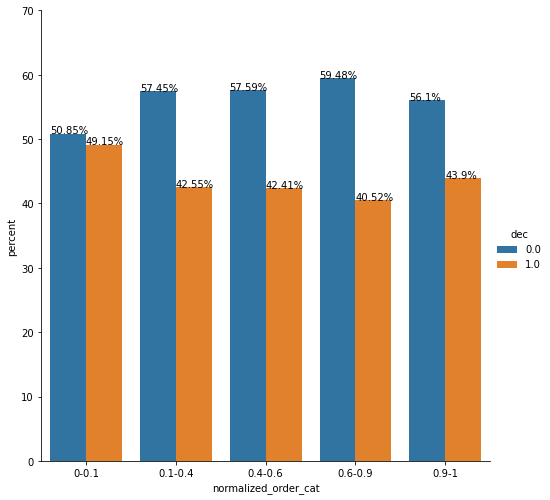

In [51]:
cat_order = ['0-0.1', '0.1-0.4', '0.4-0.6', '0.6-0.9', '0.9-1']

df1 = df.groupby('normalized_order_cat')['dec'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(
    x='normalized_order_cat',
    y='percent',
    hue='dec',
    kind='bar',
    data=df1,
    order=cat_order,
    height=7
    )

g.ax.set_ylim(0,70)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

We observe that people are more likely to give a positive answer to their date at the begining of event, 
then the positive response rate decrease during the middle of the event, probably because people get socially tired after 
several dates and therefore less likely to engage conversation or because they already gave positive answers and don't see the point
of getting more match. At the end of the event, the rate increase maybe due to people trying to get a late match because they didn't had much success
during the event.